In [2]:
##Imports
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

sp60k = pd.read_csv('C:/Users/Holdings/Documents/results/spBlock60.csv',sep=';')
sp120k = pd.read_csv('C:/Users/Holdings/Documents/results/spBlock120.csv',sep=';')
sp240k = pd.read_csv('C:/Users/Holdings/Documents/results/spBlock240.csv',sep=';')
sp480k = pd.read_csv('C:/Users/Holdings/Documents/results/spBlock480.csv',sep=';')
random = pd.read_csv('C:/Users/Holdings/Documents/results/random_pred.csv')
buf = pd.read_csv('C:/Users/Holdings/Documents/data/fut_env/buff_cur_pred.csv')

##Prepare data
sp120k = sp120k.rename({'occurrenceStatus.1': 'occurrenceStatus', 'pred.1': 'pred'}, axis=1) 
sp240k = sp240k.rename({'occurrenceStatus.2': 'occurrenceStatus', 'pred.2': 'pred'}, axis=1) 
sp480k = sp480k.rename({'occurrenceStatus.3': 'occurrenceStatus', 'pred.3': 'pred'}, axis=1) 
buf = buf.rename({'occurrenceStatus': 'geometry.2'}, axis=1) 
buf = buf.rename({'Unnamed: 0' : 'occurrenceStatus'}, axis=1)

sp60k['pred'] = sp60k['pred'].apply(lambda x: float(x.split()[0].replace(',', '.')))
sp120k['pred'] = sp120k['pred'].apply(lambda x: float(x.split()[0].replace(',', '.')))
sp240k['pred'] = sp240k['pred'].apply(lambda x: float(x.split()[0].replace(',', '.')))
sp480k['pred'] = sp480k['pred'].apply(lambda x: float(x.split()[0].replace(',', '.')))

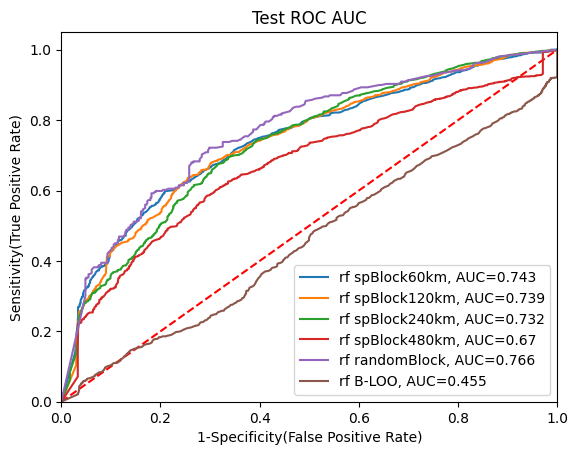

In [6]:
plt.figure(0).clf()
fpr, tpr, thresholds = metrics.roc_curve(sp60k['occurrenceStatus'], sp60k['pred'])
# Calculate Area under the curve to display on the plot
auc = round(metrics.roc_auc_score(sp60k['occurrenceStatus'], sp60k['pred']),3)
# Now, plot the computed values
plt.plot(fpr, tpr, label="rf spBlock60km, AUC="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Test ROC AUC')



fpr, tpr, thresholds = metrics.roc_curve(sp120k['occurrenceStatus'], sp120k['pred'])
auc = round(metrics.roc_auc_score(sp120k['occurrenceStatus'], sp120k['pred']),3)
plt.plot(fpr, tpr, label="rf spBlock120km, AUC="+str(auc))


fpr, tpr, thresholds = metrics.roc_curve(sp240k['occurrenceStatus'], sp240k['pred'])
auc = round(metrics.roc_auc_score(sp240k['occurrenceStatus'], sp240k['pred']),3)
plt.plot(fpr, tpr, label="rf spBlock240km, AUC="+str(auc))


fpr, tpr, thresholds = metrics.roc_curve(sp480k['occurrenceStatus'], sp480k['pred'])
auc = round(metrics.roc_auc_score(sp480k['occurrenceStatus'], sp480k['pred']),3)
plt.plot(fpr, tpr, label="rf spBlock480km, AUC="+str(auc))

fpr, tpr, thresholds = metrics.roc_curve(random['occurrenceStatus'], random['pred'])
auc = round(metrics.roc_auc_score(random['occurrenceStatus'], random['pred']),3)
plt.plot(fpr, tpr, label="rf randomBlock, AUC="+str(auc))

fpr, tpr, thresholds = metrics.roc_curve(buf['occurrenceStatus'], buf['pred'])
auc = round(metrics.roc_auc_score(buf['occurrenceStatus'], buf['pred']),3)
plt.plot(fpr, tpr, label="rf B-LOO, AUC="+str(auc))

plt.legend()